In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import sklearn
#!pip install keras
#!pip install tensorflow

In [79]:
#!pip install keras==3.0.0

   ---------------------------------------- 0.0/997.1 kB ? eta -:--:--
   ------ --------------------------------- 163.8/997.1 kB 3.3 MB/s eta 0:00:01
   ------------ --------------------------- 317.4/997.1 kB 5.0 MB/s eta 0:00:01
   --------------------- ------------------ 542.7/997.1 kB 4.3 MB/s eta 0:00:01
   ------------------------------- -------- 778.2/997.1 kB 4.9 MB/s eta 0:00:01
   ---------------------------------------  993.3/997.1 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 997.1/997.1 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/101.3 kB ? eta -:--:--
   ------------------------------------ --- 92.2/101.3 kB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 101.3/101.3 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [3]:
#unifying names 
data=pd.read_csv("train.csv")
data = data.rename(columns={"pickup_BoroCode":"pickup_boro_code","pickup_NTACode":"pickup_nta_code","dropoff_BoroCode":"dropoff_boro_code","dropoff_NTACode":"dropoff_nta_code", "pickup_doy":"pickup_day"})
data=data[data["length_time"]<=4236]
data=data.loc[data["length_time"]>=60] 
data=data.loc[data["trip_distance"]>=0.01]

In [8]:
data

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
0,1,1.75,18,5,19,132,4,520,1,MN15,1,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19
1,1,2.95,18,5,19,127,6,824,1,MN21,1,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24
2,1,2.46,7,5,19,132,4,1016,1,MN25,1,MN27,-74.012741,40.702229,-73.998878,40.713711,2,1,1.14,11.5,MN25-MN27
3,1,1.66,11,5,20,134,6,550,1,MN99,1,MN20,-73.970909,40.767231,-73.979507,40.752331,2,1,1.28,7.5,MN99-MN20
4,1,1.75,20,5,19,128,7,501,1,MN20,1,MN22,-73.973869,40.747925,-73.986618,40.730328,1,1,1.40,7.5,MN20-MN22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343741,1,2.00,20,5,21,145,3,740,1,MN12,1,MN36,-73.978676,40.783512,-73.938370,40.850533,2,1,5.84,18.5,MN12-MN36
343742,1,1.00,23,5,21,141,6,193,1,MN14,1,MN12,-73.982048,40.775452,-73.976860,40.783520,2,6,0.70,4.5,MN14-MN12
343743,1,2.35,19,5,19,132,4,764,1,MN20,1,MN22,-73.974472,40.747253,-73.983070,40.726955,1,1,1.70,10.0,MN20-MN22
343744,1,2.65,21,5,20,140,5,955,1,MN13,1,MN27,-73.993607,40.745293,-73.987350,40.722256,1,1,2.20,12.0,MN13-MN27


In [116]:
y=data["response"]
X=data.drop(["response","pair","pickup_month"], axis=1)
X['vendor_id']=X["vendor_id"].map(str)
X['pickup_boro_code']=X["pickup_boro_code"].map(str)
X['dropoff_boro_code']=X["dropoff_boro_code"].map(str)
X['pickup_week']=X["pickup_week"].map(str)
X['pickup_wday']=X["pickup_wday"].map(str)
X['pickup_day']=X["pickup_day"].map(str)
X=pd.get_dummies(X)

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error

def evaluate_estimator(estimator, X, y): 
    # Make predictions
    y_pred = estimator.predict(X)
    
    
    mae = mean_absolute_error(y, y_pred)
    
    # Create a dictionary to hold the performance metrics
    metrics = {
        'MAE': mae
    }
    
    return metrics


In [118]:
import numpy as np
import matplotlib.pyplot as plt

def plot_residuals(model, X, y):
    """
    Plot residuals of a model.
    
    Parameters:
        model: Fitted regression model (e.g., from scikit-learn)
        X: Independent variables (features)
        y: Observed values
        
    Returns:
        None
    """
    # Make predictions using the model
    y_pred = model.predict(X)

    # Compute residuals
    residuals = y - y_pred

    # Plot residuals against predicted values
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
    plt.show()

In [119]:
def min_max_scaler(X):
    return (X-min(X))/(max(X)-min(X))
for column in ["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","trip_distance","fare_amount","length_time","pickup_hour"]:
    X[column]=min_max_scaler(X[column])

In [120]:
X

,weight,pickup_hour,length_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount,pickup_week_18,pickup_week_19,pickup_week_20,pickup_week_21,pickup_week_22,pickup_day_122,pickup_day_123,pickup_day_124,pickup_day_125,pickup_day_126,pickup_day_127,pickup_day_128,pickup_day_129,pickup_day_130,pickup_day_131,pickup_day_132,pickup_day_133,pickup_day_134,pickup_day_135,pickup_day_136,pickup_day_137,pickup_day_138,pickup_day_139,pickup_day_140,pickup_day_141,pickup_day_142,pickup_day_143,pickup_day_144,pickup_day_145,pickup_day_146,pickup_day_147,pickup_day_148,pickup_day_149,pickup_day_150,pickup_day_151,pickup_day_152,pickup_wday_1,pickup_wday_2,pickup_wday_3,pickup_wday_4,pickup_wday_5,pickup_wday_6,pickup_wday_7,pickup_boro_code_1,pickup_boro_code_2,pickup_boro_code_3,pickup_boro_code_4,pickup_boro_code_5,pickup_nta_code_BK09,pickup_nta_code_BK17,pickup_nta_code_BK19,pickup_nta_code_BK28,pickup_nta_code_BK30,pickup_nta_code_BK31,pickup_nta_code_BK32,pickup_nta_code_BK33,pickup_nta_code_BK34,pickup_nta_code_BK35,pickup_nta_code_BK37,pickup_nta_code_BK38,pickup_nta_code_BK40,pickup_nta_code_BK41,pickup_nta_code_BK42,pickup_nta_code_BK43,pickup_nta_code_BK44,pickup_nta_code_BK50,pickup_nta_code_BK58,pickup_nta_code_BK60,pickup_nta_code_BK61,pickup_nta_code_BK63,pickup_nta_code_BK64,pickup_nta_code_BK68,pickup_nta_code_BK69,pickup_nta_code_BK72,pickup_nta_code_BK73,pickup_nta_code_BK75,pickup_nta_code_BK76,pickup_nta_code_BK77,pickup_nta_code_BK78,pickup_nta_code_BK79,pickup_nta_code_BK81,pickup_nta_code_BK82,pickup_nta_code_BK83,pickup_nta_code_BK85,pickup_nta_code_BK88,pickup_nta_code_BK90,pickup_nta_code_BK91,pickup_nta_code_BK95,pickup_nta_code_BK99,pickup_nta_code_BX06,pickup_nta_code_BX09,pickup_nta_code_BX10,pickup_nta_code_BX13,pickup_nta_code_BX14,pickup_nta_code_BX22,pickup_nta_code_BX26,pickup_nta_code_BX29,pickup_nta_code_BX30,pickup_nta_code_BX34,pickup_nta_code_BX35,pickup_nta_code_BX36,pickup_nta_code_BX39,pickup_nta_code_BX40,pickup_nta_code_BX41,pickup_nta_code_BX43,pickup_nta_code_BX46,pickup_nta_code_BX52,pickup_nta_code_BX59,pickup_nta_code_BX63,pickup_nta_code_BX75,pickup_nta_code_MN01,pickup_nta_code_MN03,pickup_nta_code_MN04,pickup_nta_code_MN06,pickup_nta_code_MN09,pickup_nta_code_MN11,pickup_nta_code_MN12,pickup_nta_code_MN13,pickup_nta_code_MN14,pickup_nta_code_MN15,pickup_nta_code_MN17,pickup_nta_code_MN19,pickup_nta_code_MN20,pickup_nta_code_MN21,pickup_nta_code_MN22,pickup_nta_code_MN23,pickup_nta_code_MN24,pickup_nta_code_MN25,pickup_nta_code_MN27,pickup_nta_code_MN28,pickup_nta_code_MN31,pickup_nta_code_MN32,pickup_nta_code_MN33,pickup_nta_code_MN34,pickup_nta_code_MN35,pickup_nta_code_MN36,pickup_nta_code_MN40,pickup_nta_code_MN50,pickup_nta_code_MN99,pickup_nta_code_QN01,pickup_nta_code_QN02,pickup_nta_code_QN03,pickup_nta_code_QN06,pickup_nta_code_QN07,pickup_nta_code_QN17,pickup_nta_code_QN18,pickup_nta_code_QN19,pickup_nta_code_QN20,pickup_nta_code_QN21,pickup_nta_code_QN22,pickup_nta_code_QN25,pickup_nta_code_QN26,pickup_nta_code_QN27,pickup_nta_code_QN28,pickup_nta_code_QN29,pickup_nta_code_QN30,pickup_nta_code_QN31,pickup_nta_code_QN35,pickup_nta_code_QN37,pickup_nta_code_QN38,pickup_nta_code_QN42,pickup_nta_code_QN45,pickup_nta_code_QN47,pickup_nta_code_QN48,pickup_nta_code_QN49,pickup_nta_code_QN50,pickup_nta_code_QN52,pickup_nta_code_QN53,pickup_nta_code_QN54,pickup_nta_code_QN55,pickup_nta_code_QN56,pickup_nta_code_QN57,pickup_nta_code_QN60,pickup_nta_code_QN61,pickup_nta_code_QN63,pickup_nta_code_QN68,pickup_nta_code_QN70,pickup_nta_code_QN71,pickup_nta_code_QN72,pickup_nta_code_QN76,pickup_nta_code_QN98,pickup_nta_code_QN99,pickup_nta_code_SI22,pickup_nta_code_SI35,pickup_nta_code_SI37,dropoff_boro_code_1,dropoff_boro_code_2,dropoff_boro_code_3,dropoff_boro_code_4,dropoff_boro_code_5,dropoff_nta_code_BK09,dropoff_nta_code_BK17,dropoff_nta_code_BK19,dropoff_nta_code_BK21,dropoff_nta_code_BK23,dropoff_nta_code_BK25,dropoff_nta_code

In [115]:
import sklearn.decomposition
pca=sklearn.decomposition.PCA(n_components=350)
pca.fit(X)

MemoryError: Unable to allocate 11.3 GiB for an array with shape (4464, 341009) and data type object

In [37]:
import plotly.express as px
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [121]:
import sklearn.decomposition
pca=sklearn.decomposition.PCA(n_components=100)
pca.fit(X)

PCA(n_components=100)

In [11]:
X_transformed=pca.transform(X)

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn
import sklearn.neural_network
# Load the Iris dataset
callback = keras.callbacks.EarlyStopping(monitor='loss',patience=5)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import tensorflow.python.keras.backend as K

model = Sequential()
model.add(Dense(100,input_shape=(100,), kernel_initializer='normal', activation='relu'))  # Input layer with 10 features
model.add(Dense(100, activation='softmax'))     
model.add(Dense(64, activation='gelu'))       
model.add(Dense(32, activation='log_softmax')) 
model.add(Dense(16, activation='gelu'))       # Hidden layer with 32 neurons
      # Hidden layer with 32 neurons
model.add(Dense(1))                                    # Output layer with 1 neuron for regression

# Compile the model
model.compile(loss="mean_absolute_error",optimizer="adam")

In [109]:
history=model.fit(X_train, y_train, epochs=100, batch_size=400, validation_split=0.1)

Epoch 1/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1837 - val_loss: 0.6478
Epoch 2/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6539 - val_loss: 0.6344
Epoch 3/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6353 - val_loss: 0.6263
Epoch 4/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6332 - val_loss: 0.6268
Epoch 5/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6280 - val_loss: 0.6219
Epoch 6/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6293 - val_loss: 0.6201
Epoch 7/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6251 - val_loss: 0.6173
Epoch 8/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6213 - val_loss: 0.6179
Epoch 9/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6189 - val_loss: 0.6151
Epoch 10/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6168 - val_loss: 0.6169
Epoch 11/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6126 - val_loss: 0.6165
Epoch 12/100
614/614 ━━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

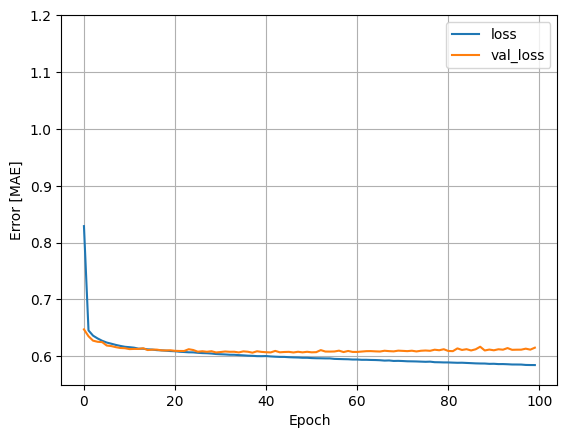

In [103]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0.55, 1.2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MAE]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [65]:
pred=model.predict(X_test)

2132/2132 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step


In [70]:
p=np.zeros(len(pred))
for i in range(len(pred)):
   p[i]=pred[i][0]

In [71]:
p

array([11.15263271,  1.83565068,  4.87887478, ...,  2.35746932,
        2.87502551,  2.1046133 ])

In [43]:
np.array(y_test)

array([11.67,  1.86,  4.  , ...,  2.46,  3.05,  1.5 ])

In [73]:
import plotly.express as px

px.scatter(x=np.array(y_test),y=p)

In [91]:
test=pd.read_csv("test.csv")

In [92]:
test=test.drop(["pair"], axis=1)

In [93]:
test["vendor_id"]=test["vendor_id"].map(str)
test=pd.get_dummies(test)

In [94]:
test = test.reindex(X.columns, axis=1, fill_value=0)

In [103]:
result=pd.Series(rf_regressor.predict(test))

In [106]:
result.to_csv("result.txt",sep="\t", index=False,header=False)

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores=learning_curve(estimator=rf_regressor,X=x_train,y=y_train)
plt.plot(train_sizes,train_scores),plt.plot(train_sizes,valid_scores)
